# Clustering Algorithms

## Project Scope:

Malls and stores can use machine learning models to optimize sales and target specific customers.


**Your role:** You are provided with customer data and need to look for patterns between customer attributes.

**Goal:** Build an unsupervised clustering model for customer classification. Use modularized code to find correlations between variables, find the optimal K value, and create the model. One model will be made for two variables and another will be made for three.

**Specifics:**

* Machine Learning task: Clustering model
* Target variable: N/A
* Input variables: Refer to data dictionary below
* Success Criteria: Cannot be validated beforehand


## Data Dictionary:

* **CustomerID:** Unique ID assigned to the customer
* **Gender:** Customer's gender
* **Age:** Customer's age
* **Annual_Income:** Customer annual income (*1000 dollars)
* **Spending_Score:** Score assigned between 1-100 by the mall based on customer's spending behaviour

This project will focus on Age, Annual Income, and Spending Score.

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [1]:
from src import correl
from src import kMeans
from src import modelSaveLoad

## 1) Observe the characteristics of the dataset

The Descriptive statistics for this dataset can be seen below:
       Customer_ID         Age  Annual_Income  Spending_Score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000000       99.000000


The Correlation matrix for this dataset can be seen below:
                Customer_ID       Age  Annual_Income  Spending_Score
Customer_ID        1.000000  0.015249       0.999638        0.013149
Age                0.015249  1.000000       0.019767       -0.344940
Annual_Income      0.999638  0.019767       1.000000        0.007840
Spending_Score     0.013149 -0.344940     

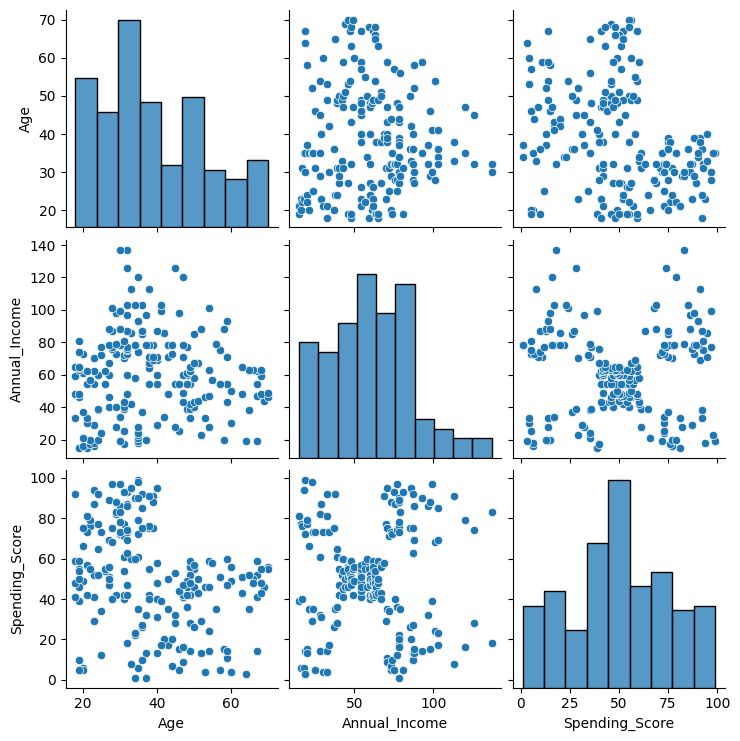



The following is a second pairplot:


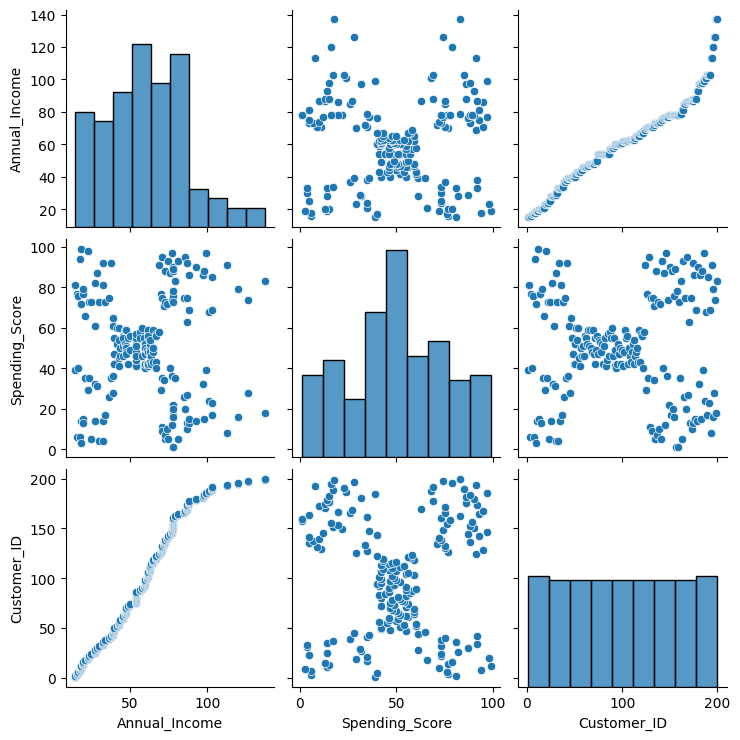

In [2]:
corr_df = correl.corrplots(r'data\mall_customers.csv',['Age','Annual_Income','Spending_Score','Customer_ID'], method = "spearman", print_details=True)

* Annual income and customer ID have a high positive correlation, but unique IDs must be removed during machine learning model creation.
* Annual income and spending score have a low positive correlation, but the plots show clusters of data points. This suggests creation of a cluster model.
* Age and spending score have a negative correlation. Distinct clusters are not evident, but the data does form a shape.
* Age and annual income have a low positive correlation. Distinct clusters are not evident, but a shape does form.
* Income vs. spending score shows some possible outliers, but these are not severe.

## 2) Correlation methods:

* Pearson Correlation
* Spearman Correlation

Spearman correlation was used earlier because it is used for monotonic and not necessarily linear data.

Confirmation that no correlation between the variables

* The above data plots show that correlation is low or medium (not high) between the three main attributes.

## 3) 2-dimensional model

The following model was created for the variables Annual_Income and Spending_Score. K was set to 5 because the graph showed 5 distinct clusters.

The cluster centers for this model can be seen below:
[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


The first five rows of this dataset (including clusters) can be seen below:
   Customer_ID  Gender  Age  Annual_Income  Spending_Score  Cluster
0            1    Male   19             15              39        1
1            2    Male   21             15              81        4
2            3  Female   20             16               6        1
3            4  Female   23             16              77        4
4            5  Female   31             17              40        1


Number of values per cluster:
Cluster
3    81
0    39
2    35
1    23
4    22
Name: count, dtype: int64


Visualization of clusters:


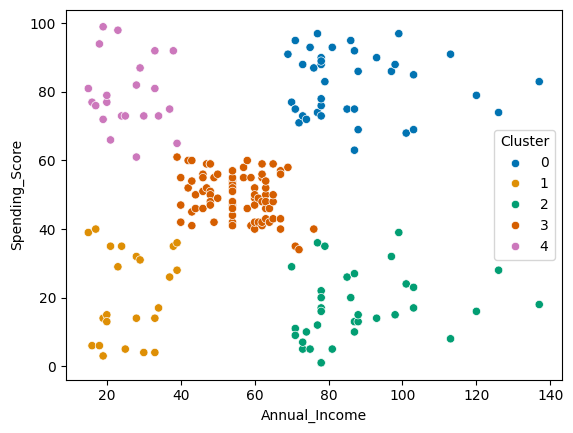

In [3]:
kmodel, cluster_df = kMeans.trainKModel(corr_df,['Annual_Income','Spending_Score'], n_clusters=5, print_details=True)

As you can see, the graph shows 5 distinct clusters, with cluster 0 having the most data points (customers).

It is time to verify these results using the Elbow method and Silhouette scores.

## 4) Get scores and optimal K value

get_scores_df checks whether the assumption of 5 clusters is valid. It generates models with K values from 3 to 8 and gets scores for each one.

The Elbow plot when trying the model with input_params can be seen below:


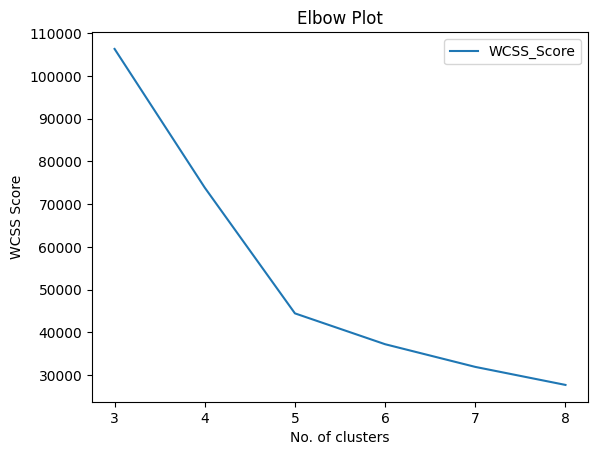



The Silhouette Score plot when trying the model with input_params can be seen below:


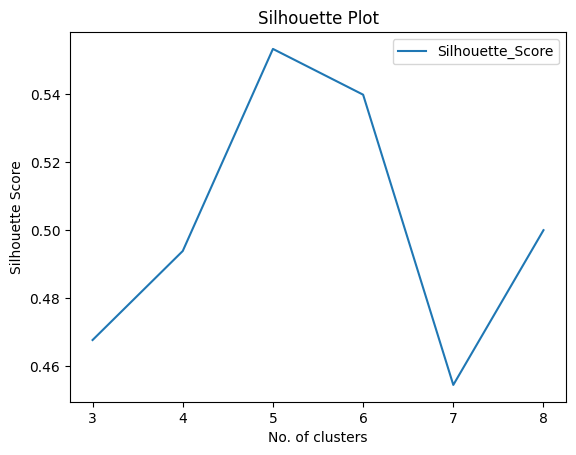



The scores table can be seen below:
   cluster     WCSS_Score  Silhouette_Score
0        3  106348.373062          0.467614
1        4   73880.644962          0.493795
2        5   44454.476480          0.553218
3        6   37233.814511          0.539761
4        7   31924.238907          0.454412
5        8   27708.084424          0.499921


The optimal K value is 5


In [5]:
# Get a dataframe of the scores and the optimal k value.
scores_df_2d, optimal_k_2d = kMeans.get_scores_df(corr_df,['Annual_Income','Spending_Score'], plot_graphs=True)

The Elbow plot is visual and uses Within Cluster Sum of Squares values. The optimal K value according to it is the point where the slope of the line changes the most (the "Elbow Joint").

The highest Silhouette score (closest to +1) is the one which corresponds to the optimal K value. This is used to calculate optimal_k. It is 5 in this case.


In [ ]:
# Save the 2d scores and cluster dataframes just in case
scores_df_2d.to_csv(r"data\2d_Scores_df.csv")
cluster_df.to_csv(r"data\2d_Cluster_df.csv")

What happens if we use Age, Annual_Income, and Spending_Score?


The Elbow plot when trying the model with input_params can be seen below:


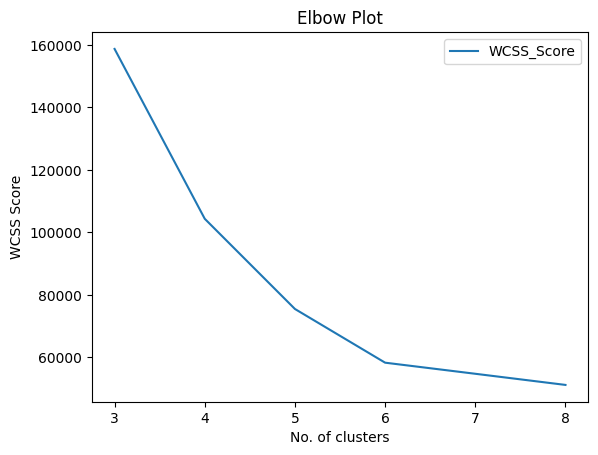



The Silhouette Score plot when trying the model with input_params can be seen below:


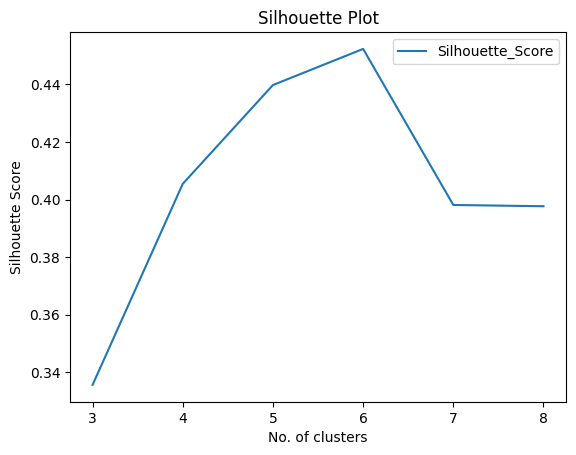



The scores table can be seen below:
   cluster     WCSS_Score  Silhouette_Score
0        3  158744.971080          0.335580
1        4  104366.151456          0.405463
2        5   75493.844640          0.439808
3        6   58302.406309          0.452357
4        7   54750.182189          0.398118
5        8   51182.610057          0.397681


The optimal K value is 6


In [11]:
scores_df_3d, optimal_k_3d = kMeans.get_scores_df(cluster_df,['Age','Annual_Income','Spending_Score'], plot_graphs=True)

With 3 features, the optimal K value becomes 6, in this case.

In [ ]:
# Save dataframe for later
scores_df_3d.to_csv(r"data\3d_Scores_df.csv")

## 6) Create the 3D model with K=6 
(Note that the 3D plot will be an interactive plot using Plotly)

In [ ]:
kmodel_3d, cluster_df_3d = kMeans.trainKModel(corr_df,['Age','Annual_Income','Spending_Score'], n_clusters=6, print_details=True)

The cluster centers for this model can be seen below:
[[27.         56.65789474 49.13157895]
 [56.34090909 53.70454545 49.38636364]
 [41.68571429 88.22857143 17.28571429]
 [32.69230769 86.53846154 82.12820513]
 [44.31818182 25.77272727 20.27272727]
 [25.27272727 25.72727273 79.36363636]]


The first five rows of this dataset (including clusters) can be seen below:
   Customer_ID  Gender  Age  Annual_Income  Spending_Score  Cluster
0            1    Male   19             15              39        4
1            2    Male   21             15              81        5
2            3  Female   20             16               6        4
3            4  Female   23             16              77        5
4            5  Female   31             17              40        4


Number of values per cluster:
Cluster
1    44
3    39
0    38
2    35
4    22
5    22
Name: count, dtype: int64


Visualization of clusters:


Note that Cluster 3 has high income and spending scores, suggesting that these customers could be targeted.

In [ ]:
# Save the cluster dataframe to a csv file
cluster_df_3d.to_csv(r"data\3d_cluster_df.csv")

In [ ]:
# This model can be saved to a Pickle file as well:
modelSaveLoad.pickleModel(r"models\Cluster_Model_k6.pkl", 'wb', kmodel_3d)

When training the model (inside kMeans.trainModel), init was manually set to "kmeans++". This seems to be the default value, however.

"kmeans++" internally analyzes the patterns of the data, such as the shape of data/cluster, and then initializes the centroids.